In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec
from scipy.io import loadmat

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [4]:
tx_trans_z0_1_mod = xr.open_dataset(input_path + 'tx_trans_z0_1_mod.nc').tx_trans_z0_1_mod
print(tx_trans_z0_1_mod)
tx_trans_z0_1_slope_mod = xr.open_dataset(input_path + 'tx_trans_z0_1_slope_mod.nc').tx_trans_z0_1_slope_mod*10
print(tx_trans_z0_1_slope_mod)
tx_trans_z0_1_p_value_mod = xr.open_dataset(input_path + 'tx_trans_z0_1_p_value_mod.nc').tx_trans_z0_1_p_value_mod
print(tx_trans_z0_1_p_value_mod)
tx_trans_z0_1_std_err_mod = xr.open_dataset(input_path + 'tx_trans_z0_1_std_err_mod.nc').tx_trans_z0_1_std_err_mod*10
print(tx_trans_z0_1_std_err_mod)

tx_trans_z0_025_mod = xr.open_dataset(input_path + 'tx_trans_z0_025_mod.nc').tx_trans_z0_025_mod
print(tx_trans_z0_025_mod)
tx_trans_z0_025_slope_mod = xr.open_dataset(input_path + 'tx_trans_z0_025_slope_mod.nc').tx_trans_z0_025_slope_mod*10
print(tx_trans_z0_025_slope_mod)
tx_trans_z0_025_p_value_mod = xr.open_dataset(input_path + 'tx_trans_z0_025_p_value_mod.nc').tx_trans_z0_025_p_value_mod
print(tx_trans_z0_025_p_value_mod)
tx_trans_z0_025_std_err_mod = xr.open_dataset(input_path + 'tx_trans_z0_025_std_err_mod.nc').tx_trans_z0_025_std_err_mod*10
print(tx_trans_z0_025_std_err_mod)

tx_trans_z0_01_mod = xr.open_dataset(input_path + 'tx_trans_z0_01_mod.nc').tx_trans_z0_01_mod
print(tx_trans_z0_01_mod)
tx_trans_z0_01_slope_mod = xr.open_dataset(input_path + 'tx_trans_z0_01_slope_mod.nc').tx_trans_z0_01_slope_mod*10
print(tx_trans_z0_01_slope_mod)
tx_trans_z0_01_p_value_mod = xr.open_dataset(input_path + 'tx_trans_z0_01_p_value_mod.nc').tx_trans_z0_01_p_value_mod
print(tx_trans_z0_01_p_value_mod)
tx_trans_z0_01_std_err_mod = xr.open_dataset(input_path + 'tx_trans_z0_01_std_err_mod.nc').tx_trans_z0_01_std_err_mod*10
print(tx_trans_z0_01_std_err_mod)

<xarray.DataArray 'tx_trans_z0_1_mod' (yt_ocean: 186, xu_ocean: 151, year: 25)>
[702150 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 17.85 18.59 19.36
  * xu_ocean  (xu_ocean) float64 140.0 141.0 142.0 143.0 ... 288.0 289.0 290.0
  * year      (year) int64 2233 2234 2235 2236 2237 ... 2253 2254 2255 2256 2257
<xarray.DataArray 'tx_trans_z0_1_slope_mod' (yt_ocean: 186, xu_ocean: 151)>
array([[ 1.86827275,  1.86827275,  1.86827275, ...,  1.86827275,
         1.86827275,  1.86827275],
       [ 1.86827275,  1.86827275,  1.86827275, ...,  1.86827275,
         1.86827275,  1.86827275],
       [ 1.86827275,  1.86827275,  1.86827275, ...,  1.86827275,
         1.86827275,  1.86827275],
       ...,
       [ 0.29821226,  0.31164546,  0.32133024, ..., -0.12260521,
        -0.12273378, -0.12322768],
       [ 0.58268749,  0.58308119,  0.56997819, ..., -0.12260521,
        -0.12273378, -0.12322768],
       [ 0.79511055,  0.78450845,  0.77389512, .

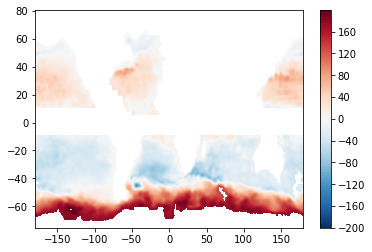

In [28]:
data=loadmat('/g/data3/hh5/tmp/cosima/observations/original/psi_barotropic.mat')
lon = data['lon_p'][0,:]
lat = data['lat_p'][0,:]
psi = data['psi']/1e6 # in Sv
plt.contourf(lon,lat,psi,levels=np.arange(-200,200),cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.47727272727272724, y1=0.88)
[0.125, 0.48681818181818187, 0.5272727272727272, 0.88]
Bbox(x0=0.5477272727272726, y0=0.5368181818181819, x1=0.8999999999999999, y1=0.88)
[0.5477272727272726, 0.48681818181818187, 0.95, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.47727272727272724, y1=0.46818181818181825)
[0.125, 0.07500000000000011, 0.5272727272727272, 0.46818181818181825]
Bbox(x0=0.5477272727272726, y0=0.1250000000000001, x1=0.8999999999999999, y1=0.46818181818181825)
[0.5477272727272726, 0.07500000000000011, 0.95, 0.46818181818181825]


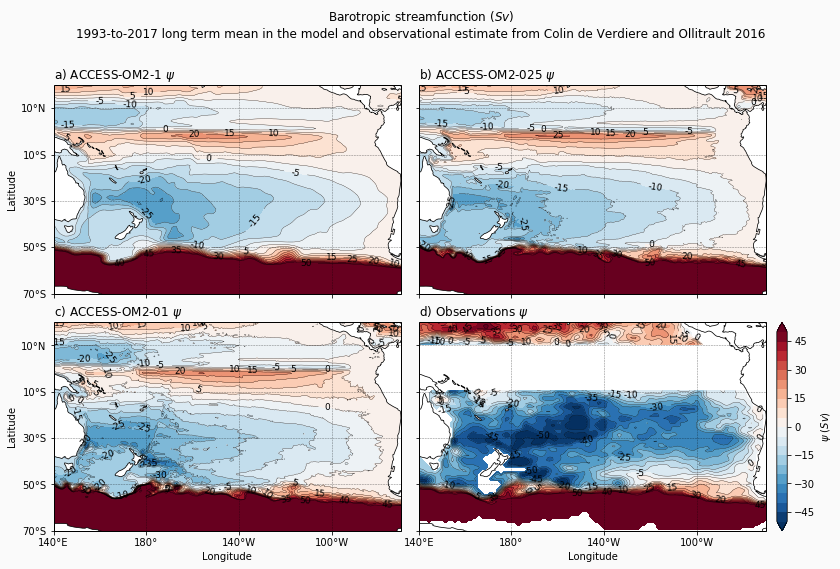

In [79]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Barotropic streamfunction ($Sv$)' +
    '\n1993-to-2017 long term mean in the model and observational estimate from Colin de Verdiere and Ollitrault 2016',
    x=0.55,y=1, ha='center')

row=2
col=2

central_longitude = 140

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-50,50,5)
cmap = plt.cm.RdBu_r
data = tx_trans_z0_1_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 $\psi$', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-50,50,5)
cmap = plt.cm.RdBu_r
data = tx_trans_z0_025_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 $\psi$', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-50,50,5)
cmap = plt.cm.RdBu_r
data = tx_trans_z0_01_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 $\psi$', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-50,50,5)
cmap = plt.cm.RdBu_r
data = psi3
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('d) Observations $\psi$', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="3%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.03, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$\psi$ ($Sv$)', cax=axins)

savefigure('psi_absolute2')

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.47727272727272724, y1=0.88)
[0.125, 0.48681818181818187, 0.5272727272727272, 0.88]
Bbox(x0=0.5477272727272726, y0=0.5368181818181819, x1=0.8999999999999999, y1=0.88)
[0.5477272727272726, 0.48681818181818187, 0.95, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.47727272727272724, y1=0.46818181818181825)
[0.125, 0.07500000000000011, 0.5272727272727272, 0.46818181818181825]
Bbox(x0=0.5477272727272726, y0=0.1250000000000001, x1=0.8999999999999999, y1=0.46818181818181825)
[0.5477272727272726, 0.07500000000000011, 0.95, 0.46818181818181825]


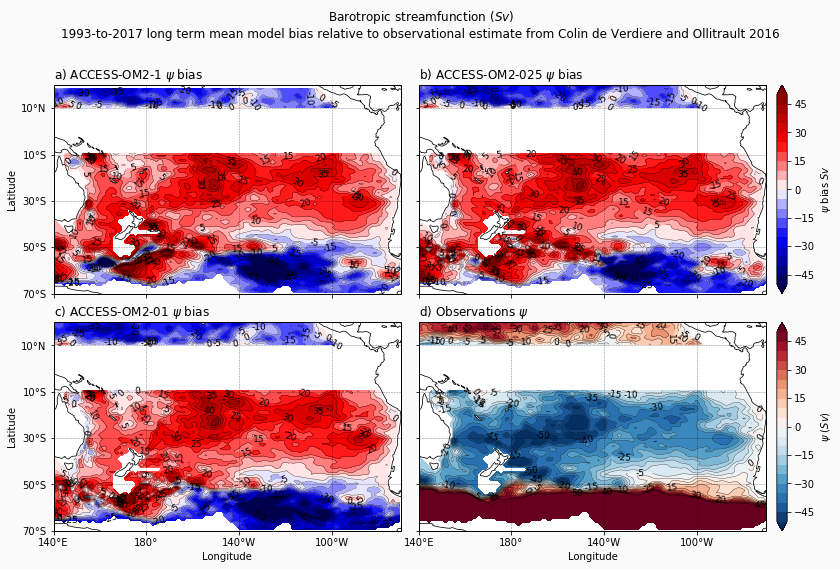

In [83]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Barotropic streamfunction ($Sv$)' +
    '\n1993-to-2017 long term mean model bias relative to observational estimate from Colin de Verdiere and Ollitrault 2016',
    x=0.55,y=1, ha='center')

row=2
col=2

central_longitude = 140

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-50,50,5)
cmap = plt.cm.seismic
data = tx_trans_z0_1_mod.mean('year').interp(xu_ocean=psi3.lon).interp(yt_ocean=psi3.lat) - psi3
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 $\psi$ bias', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
# levels=arange(-50,50,5)
# cmap = plt.cm.RdBu_r
data = tx_trans_z0_025_mod.mean('year').interp(xu_ocean=psi3.lon).interp(yt_ocean=psi3.lat) - psi3
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 $\psi$ bias', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="3%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.03, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$\psi$ bias $Sv$', cax=axins)

ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
# levels=arange(-50,50,5)
# cmap = plt.cm.RdBu_r
data = tx_trans_z0_01_mod.mean('year').interp(xu_ocean=psi3.lon).interp(yt_ocean=psi3.lat) - psi3
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 $\psi$ bias', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-50,50,5)
cmap = plt.cm.RdBu_r
data = psi3
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('d) Observations $\psi$', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="3%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.03, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$\psi$ ($Sv$)', cax=axins)

savefigure('psi_bias')

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.47727272727272724, y1=0.88)
[0.125, 0.48681818181818187, 0.5272727272727272, 0.88]
Bbox(x0=0.5477272727272726, y0=0.5368181818181819, x1=0.8999999999999999, y1=0.88)
[0.5477272727272726, 0.48681818181818187, 0.95, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.47727272727272724, y1=0.46818181818181825)
[0.125, 0.07500000000000011, 0.5272727272727272, 0.46818181818181825]


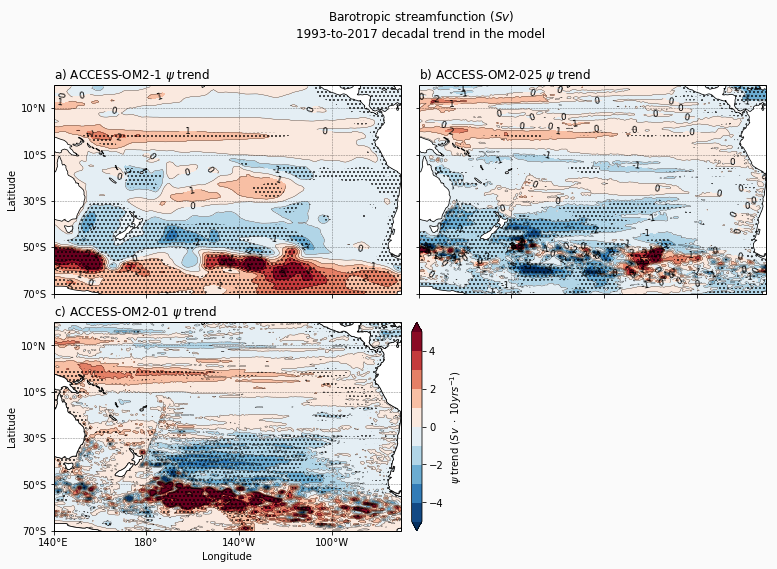

In [100]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Barotropic streamfunction ($Sv$)' +
    '\n1993-to-2017 decadal trend in the model',
    x=0.55,y=1, ha='center')

row=2
col=2

central_longitude = 140

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-5,5,1)
cmap = plt.cm.RdBu_r
data = tx_trans_z0_1_slope_mod
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = tx_trans_z0_1_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 $\psi$ trend', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
# levels=arange(-50,50,5)
# cmap = plt.cm.RdBu_r
data = tx_trans_z0_025_slope_mod
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = tx_trans_z0_025_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 $\psi$ trend', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
# levels=arange(-20,20,2)
# cmap = plt.cm.RdBu_r
data = tx_trans_z0_01_slope_mod
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
# plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = tx_trans_z0_01_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 $\psi$ trend', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree(central_longitude=central_longitude))
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
# print(pos_plot)
# levels=arange(-50,50,5)
# cmap = plt.cm.RdBu_r
# data = psi3
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
#                        transform=ccrs.PlateCarree())
# plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
# ax.set_position(bbox(pos_plot))
# ax.set_title('d) Observations $\psi$', loc='left')
# ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="3%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.03, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$\psi$ trend ($Sv\ \cdot\ 10yrs^{-1}$)', cax=axins)

savefigure('psi_trend')